In [81]:
import numpy as np
from scipy.integrate import solve_ivp
from numba import njit
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

Millennium Bridge Wobbling simulation using the inverted pendulum model for pedestrians.

In [82]:
#@njit
def RK4(N, x0, h, tmax):
    
    T=int(tmax/h)+1 
    t=np.linspace(0,tmax,T)
    X=np.zeros((N,T))
    X[:,0]=x0 
    h2=h/2 
    h6=h/6 
    
    for tt in range(1,T):
                   
        #Params to pass
        params = [N_max, r, omega, lamb, OMEGA, a, v]
    
        k1=func(X[:,tt-1], t[tt-1], params)
        k2=func(X[:,tt-1]+h2*k1, t[tt-1]+h2, params)
        k3=func(X[:,tt-1]+h2*k2, t[tt-1]+h2, params)
        k4=func(X[:,tt-1]+h*k3, t[tt-1]+h, params)
        X[:,tt]=X[:,tt-1]+h6*(k1+2*k2+2*k3+k4) #update the vector X according to the method
        
    return t,X

In [83]:
#@njit
def func(X, t, params):
    # X[0]=y
    # X[1]=vy
    # X[2:n+2]=xi
    # X[n+2:]=vxi
    
    n, r, omega, lamb, OMEGA, a, v = params
    
    fIV = np.zeros(n)
    
    for ii in range(n):
        if X[2+ii] >= 0:
            fIV[ii] = -omega[ii]**2*(X[2+ii]-p)+lamb*(X[n+2+ii]**2-v**2*(X[2+ii]-p)**2+v**2*a**2)*X[n+2+ii]
        elif X[2+ii] < 0:
            fIV[ii] = -omega[ii]**2*(X[2+ii]+p)+lamb*(X[n+2+ii]**2-v**2*(X[2+ii]+p)**2+v**2*a**2)*X[n+2+ii]
    
   
    suma=-np.sum(fIV)
    suma=(suma+n*(2*hh*X[1]+OMEGA**2*X[0]))/(1-n*r)
    
    F=np.zeros(len(X))
    
    F[0] = X[1]
    F[2:n+2] = X[n+2:]
    F[1] = -r*suma-2*hh*X[1]-OMEGA**2*X[0]
    F[n+2:] = -F[1]-fIV
    
    return F

In [84]:
#CONSTANTES DEL PUENTE
OMEGA = 1.21
lamb = 2.8
hh= 0.05
m = 70
M = 113000
a = 1.0
p = 2.0
v = 0.66
   
#CONSTANTES DEL ALGORITMO
t_max = 3000
h=0.1

In [87]:
#CONSTANTES DE LOS PEATONES
N_max = 200

omega = np.random.rand(N_max)*0.073+0.6935
B=np.sqrt(a**2+(2*hh*(omega**2-1))/(lamb*(OMEGA**2-1)))
phi=2*np.pi*np.random.rand(N_max)
r=m/(M+m*N_max)

#LAS CONDICIONES INICIALES
Ampt=r*N_max*np.mean(B)/np.sqrt((OMEGA**2-1)**2+4*hh**2) #A
PSI = np.mean(phi)-np.arctan(-2*hh/(1-OMEGA**2)) #fase del puente
initial_conditions = np.zeros(2*N_max+2)
initial_conditions[0] = Ampt*np.cos(PSI) #y(0)
initial_conditions[2:2+N_max] = B*np.sin(phi)
initial_conditions[2+N_max:] = B*np.cos(phi)


t,X = RK4(2*N_max+2, initial_conditions, h, t_max)

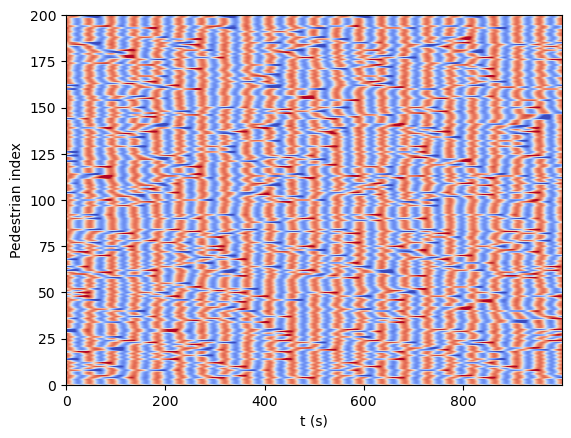

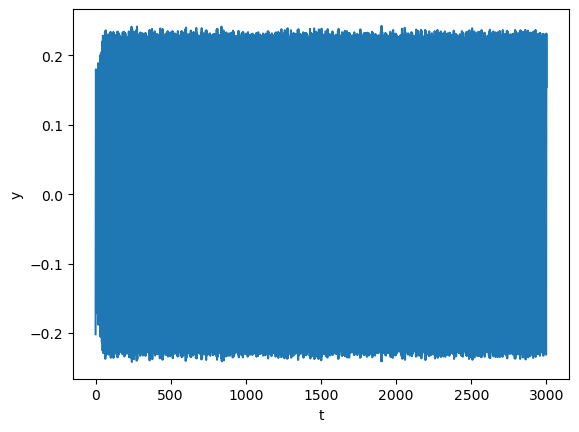

In [88]:
first_map = X[1:, 20000:21000]
fig, ax = plt.subplots()
im = ax.imshow(first_map, cmap='coolwarm', aspect='auto', norm=Normalize(vmin=-1, vmax=1))
ax.set_xlabel('t (s)')
ax.set_ylabel('Pedestrian index')
ax.set_ylim(0, N_max)


fig2, ax2 = plt.subplots()
plt.plot(t, X[0])
ax2.set_ylabel("y")
ax2.set_xlabel("t")

plt.show()

In [80]:
n_pedestrians = np.arange(0, 300, 1)
amplitudes = []

for i in n_pedestrians:
    
    print(i)
    N_max = i
    omega = np.random.rand(N_max)*0.073+0.6935
    B=np.sqrt(a**2+(2*hh*(omega**2-1))/(lamb*(OMEGA**2-1)))
    phi=2*np.pi*np.random.rand(N_max)
    r=m/(M+m*N_max)

    #LAS CONDICIONES INICIALES
    Ampt=r*N_max*np.mean(B)/np.sqrt((OMEGA**2-1)**2+4*hh**2) #A
    PSI = np.mean(phi)-np.arctan(-2*hh/(1-OMEGA**2)) #fase del puente
    initial_conditions = np.zeros(2*N_max+2)
    initial_conditions[0] = Ampt*np.cos(PSI) #y(0)
    initial_conditions[2:2+N_max] = B*np.sin(phi)
    initial_conditions[2+N_max:] = B*np.cos(phi)

    t,X = RK4(2*N_max+2, initial_conditions, h, t_max)
    
    amplitudes.append(np.nanmax(X[0, 15000:30000]))

0


C:\Users\ismae\AppData\Local\Temp\ipykernel_18968\2386590900.py:23: RuntimeWarning: All-NaN slice encountered
  amplitudes.append(np.nanmax(X[0, 15000:30000]))


1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Numero de peatones')
ax.set_ylabel('Amplitud del puente')
plt.plot(n_pedestrians, amplitudes)